# Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sparse data randomly for plotting when there are too many points of data
#   by reducing point randomly(visibility)
from functions import sparse_array

## Importing all data
Checking first 5 rows and info of data

In [2]:
file_name_all_data = "data/_nanocomposite_data.csv"
all_data = pd.read_csv(file_name_all_data, index_col=None, header=0)
all_data.drop(
    ["polymer_p2", "ratio_1_2", "filler_2", "wt_l2"], axis=1, inplace=True
)

# Adding another column to name the data
# Which is easier to evaluate when showing labels in graph
all_data["labels"] = all_data["polymer_1"] + "-" + all_data["filler_1"]
all_data.head()

,polymer_1,filler_1,wt_l1,foaming,conductivity,owner,labels
0,HDPEtreated,GNP,13.937781,0,4.838375,data set 5,HDPEtreated-GNP
1,HDPEtreated,GNP,2.289694,0,0.086995,data set 5,HDPEtreated-GNP
2,HDPEtreated,GNP,13.353691,0,5.111546,data set 5,HDPEtreated-GNP
3,HDPEtreated,GNP,23.393479,0,14.008136,data set 5,HDPEtreated-GNP
4,HDPEtreated,GNP,16.255365,0,5.732612,data set 5,HDPEtreated-GNP


In [3]:
all_data.describe()

,wt_l1,foaming,conductivity
count,5000.000000,5000.0,5.000000e+03
mean,12.859096,0.0,6.739053e+01
std,6.908721,0.0,1.357225e+02
min,0.200861,0.0,6.268632e-07
25%,6.894766,0.0,8.297364e-01
50%,12.916176,0.0,8.262248e+00
75%,18.816502,0.0,6.132272e+01
max,24.995149,0.0,1.055257e+03


### Important notice

The `conductivity` has a high range of values, from very small such as 1E-3 up to hundreds or thousands. The mean or average value does not present well data behavior.

## Evaluating `conductivity`

In [4]:
conductivity_table = all_data[["wt_l1", "conductivity", "labels"]].pivot(
    index="wt_l1", columns="labels", values="conductivity"
)
# conductivity_table.tail()

In [5]:
min = conductivity_table.min()
max = conductivity_table.max()
ratio = max / min
# conductivity can not be 0, otherwise, measurement will not be recorded
ratio_log = np.log10(ratio)

# trick to have a nice view of table
pd.DataFrame([ratio, ratio_log], index=["ratio", "ratio_log"])

labels,HDPE-GNP,HDPE-MWCNT,HDPE-SWCNT,HDPEtreated-GNP,HDPEtreated-MWCNT
ratio,103417.913028,1.501723e+07,1.683394e+09,567161.210731,4.875294e+07
ratio_log,5.014596,7.176590e+00,9.226186e+00,5.753707,7.688001e+00


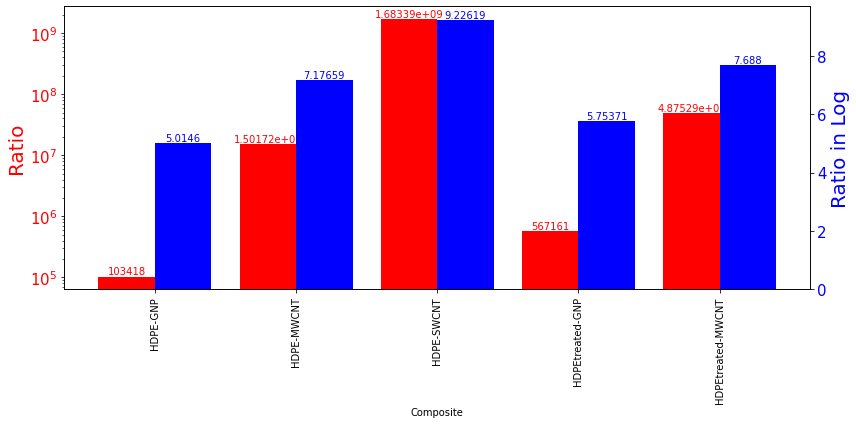

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 6))
color = "red"
p1 = ax1.bar(
    ratio_log.index,
    ratio,
    label="Ratio",
    color=color,
    align="edge",
    width=-0.4,
)

"""Style set up."""
ax1.set_xlabel("Composite")
ax1.set_ylabel("Ratio", color=color, fontsize=20)
ax1.set_yscale("log")
ax1.tick_params(axis="y", labelcolor=color)
plt.xticks(rotation="vertical")
plt.yticks(fontsize=15)
ax1.bar_label(p1, label_type="edge", color=color)

"""Second line in the same figure."""
ax2 = ax1.twinx()
color = "blue"
p2 = ax2.bar(
    ratio_log.index,
    ratio_log,
    label="ratio_log",
    color=color,
    align="edge",
    width=0.4,
)

"""Style Set up."""
ax2.set_ylabel(
    "Ratio in Log", color=color, fontsize=20
)  # we already handled the x-label with ax1
ax2.tick_params(axis="y", labelcolor=color)
ax2.bar_label(p2, label_type="edge", color=color)
plt.yticks(fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Plotting all data in log scale

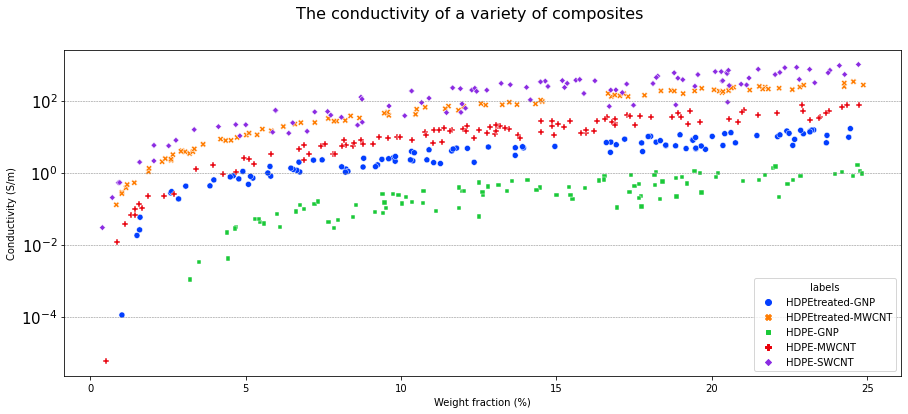

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.scatterplot(
    data=sparse_array(all_data, 0.9),
    x="wt_l1",
    y="conductivity",
    hue="labels",
    palette="bright",
    ax=ax,
    style="labels",
)
plt.xlabel("Weight fraction (%)")
plt.ylabel("Conductivity (S/m)")
plt.suptitle(
    "The conductivity of a variety of composites", fontsize=16, ha="center"
)
plt.yscale("log")
plt.grid(axis="y", color="grey", linestyle="--", linewidth=0.5)
plt.yticks(fontsize=15)

plt.show()

## At low weight fraction, the value of threshold depends on type of filler and polymer

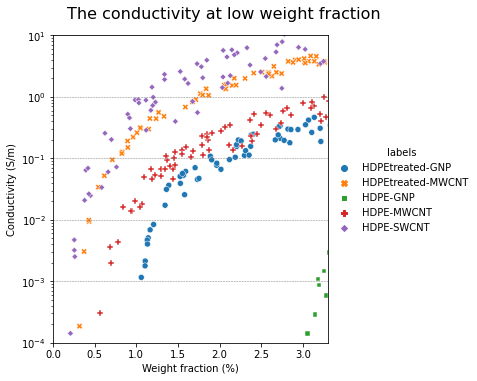

In [8]:
# Zoom in low range of wt
g = sns.relplot(
    data=sparse_array(all_data, 0.5),
    x="wt_l1",
    y="conductivity",
    hue="labels",
    kind="scatter",
    style="labels",
)
g.set_xlabels("Weight fraction (%)")
g.set_ylabels("Conductivity (S/m)")
g.fig.suptitle(
    "The conductivity at low weight fraction", y=1.05, fontsize=16, ha="center"
)
g.set(yscale="log", xlim=[0, 3.3], ylim=[1e-4, 10])
plt.grid(axis="y", color="grey", linestyle="--", linewidth=0.5)
g.despine(top=False, right=False)
plt.show()

## Different Filler has different intrinic conductivity
The filler contributes greatly on electrical conductivity of the composite in overall

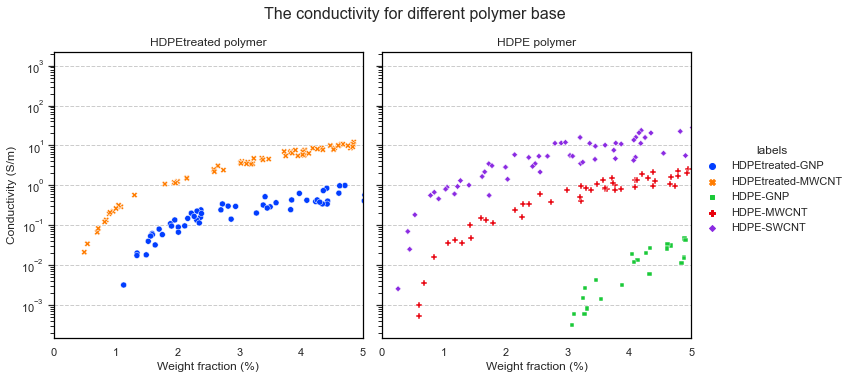

In [9]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
custom_params = {
    "axes.edgecolor": "black",
    "axes.facecolor": "white",
    "grid.color": ".8",
    "ytick.left": True,
    "grid.linestyle": "--",
    "axes.grid": True,
    "axes.grid.axis": "y",
}
sns.set_theme(rc=custom_params)

g = sns.relplot(
    data=sparse_array(all_data, 0.7),
    x="wt_l1",
    y="conductivity",
    hue="labels",
    kind="scatter",
    col="polymer_1",
    palette="bright",
    style="labels",
)
g.set_xlabels("Weight fraction (%)")
g.set_ylabels("Conductivity (S/m)")
g.fig.suptitle(
    "The conductivity for different polymer base",
    y=1.05,
    fontsize=16,
    ha="center",
)
g.despine(top=False, right=False)
g.set_titles(col_template="{col_name} polymer")
g.set(yscale="log", xlim=[0, 5])
g.despine(top=False, right=False)
plt.show()

## Treated Polymer helps improve conductivity

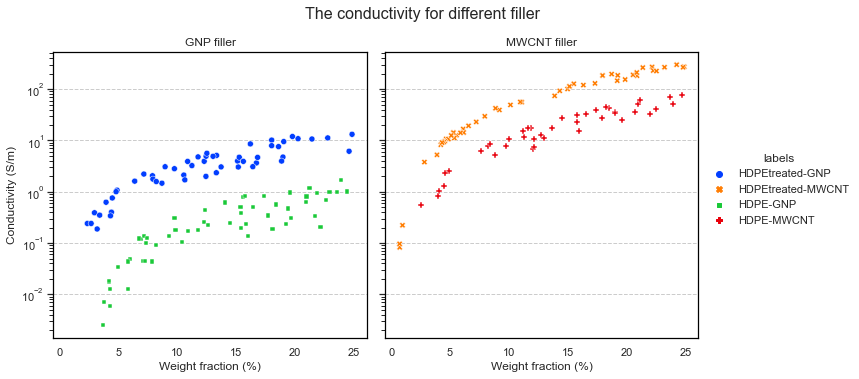

In [10]:
custom_params = {
    "axes.edgecolor": "black",
    "axes.facecolor": "white",
    "grid.color": ".8",
    "ytick.left": True,
    "grid.linestyle": "--",
    "axes.grid": True,
    "axes.grid.axis": "y",
}
sns.set_theme(rc=custom_params)
# alldata_MWCNT = alldata [alldata['filler_1']== 'MWCNT' ].copy()
all_data_treated = all_data[all_data["filler_1"] != "SWCNT"].copy()
g = sns.relplot(
    data=sparse_array(all_data_treated, 0.95),
    x="wt_l1",
    y="conductivity",
    hue="labels",
    col="filler_1",
    palette="bright",
    style="labels",
)
g.set_xlabels("Weight fraction (%)")
g.set_ylabels("Conductivity (S/m)")
g.fig.suptitle(
    "The conductivity for different filler", y=1.05, fontsize=16, ha="center"
)
g.despine(top=False, right=False)
g.set_titles(col_template="{col_name} filler")
g.set(yscale="log")
plt.show()

# What are composites missing

Based on total Polymer and Filler, what composites (combination of polymer and filler) are not be studied (generated)

In [11]:
polymer_1_all = all_data.groupby("polymer_1").size().index.to_list()
polymer_1_all_inserted = polymer_1_all.copy()
polymer_1_all_inserted.insert(0, "Filler")
filler_all = all_data.groupby("filler_1").size().index.to_list()
all_ability = pd.DataFrame(
    0, index=np.arange(len(filler_all)), columns=polymer_1_all_inserted
)
all_ability["Filler"] = filler_all
all_ability.set_index("Filler", inplace=True)

In [12]:
labels = all_data.groupby("labels").size()
for key in labels.keys():
    polymer, filler = key.split("-")
    all_ability[polymer][filler] = labels[key]
print("Numbers of data row for each composite:")
all_ability

Numbers of data row for each composite:


,HDPE,HDPEtreated
Filler,,
GNP,1000,1000
MWCNT,1000,1000
SWCNT,1000,0


In [13]:
print("Possilbe to predict (which cases have no data):")
list_to_predict = []
for polymer in polymer_1_all:
    index_0 = all_ability[all_ability[polymer] == 0].index.to_list()
    if index_0:
        for filler in index_0:
            print(polymer + "-" + filler)
            list_to_predict.append([polymer, filler])
list_to_predict

Possilbe to predict (which cases have no data):
HDPEtreated-SWCNT


[['HDPEtreated', 'SWCNT']]